In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go

encoder = LabelEncoder()
scaler = MinMaxScaler()

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets/data.csv')
data.head()

,energy,tempo,danceability,genre,loudness,liveness,valence,artist,time_signature,speechiness,track_popularity,album,name,instrumentalness,mode,key,duration_ms,acousticness,id,popularity,release_year
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3.0,0.0304,100,Die With A Smile,Die With A Smile,0.0000,0.0,6.0,251668.0,0.3080,2plbrEY59IikOBgBGLjaoe,1,2024
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4.0,0.0358,97,HIT ME HARD AND SOFT,BIRDS OF A FEATHER,0.0608,1.0,2.0,210373.0,0.2000,6dOtVTDdiauQNBQEDOtlAB,1,2024
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4.0,0.0368,93,The Secret of Us (Deluxe),That’s So True,0.0000,1.0,1.0,166300.0,0.2140,7ne4VBA60CxGM75vw0EYad,1,2024
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4.0,0.0634,81,Short n' Sweet,Taste,0.0000,0.0,0.0,157280.0,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,1,2024
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4.0,0.2600,98,APT.,APT.,0.0000,0.0,0.0,169917.0,0.0283,5vNRhkKd0yEAg8suGBpjeY,1,2024


In [3]:
data.shape

(4718, 21)

we have 4718 data entries with 21 features

<h3>numerical audio features</h3>

In [4]:
audio_features_numerical = ['energy', 'tempo', 'danceability', 'loudness', 'liveness', 'valence',
                            'speechiness', 'instrumentalness', 'duration_ms', 'acousticness']

description of the features

In [5]:
data[audio_features_numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
energy,4718.0,0.584173,0.246837,0.000202,0.438000,0.63100,0.77400,0.998
tempo,4718.0,118.276491,28.596345,48.232000,96.037250,118.13350,137.01225,241.426
danceability,4718.0,0.622409,0.187820,0.058900,0.525000,0.65400,0.75775,0.979
loudness,4718.0,-9.334061,7.171860,-48.069000,-10.386000,-7.22450,-5.35350,1.318
liveness,4718.0,0.167537,0.124280,0.021000,0.095500,0.11750,0.19575,0.979
valence,4718.0,0.481056,0.258482,0.029600,0.272250,0.48200,0.68975,0.987
speechiness,4718.0,0.101960,0.101329,0.021900,0.038600,0.05605,0.11800,0.927
instrumentalness,4718.0,0.204211,0.354177,0.000000,0.000000,0.00009,0.22725,0.991
duration_ms,4718.0,205241.615727,81410.378297,35375.000000,158438.500000,193979.00000,232480.25000,1355260.000
acousticness,4718.0,0.345003,0.326022,0.000004,0.055825,0.22950,0.60100,0.996


distribution of numerical audio features

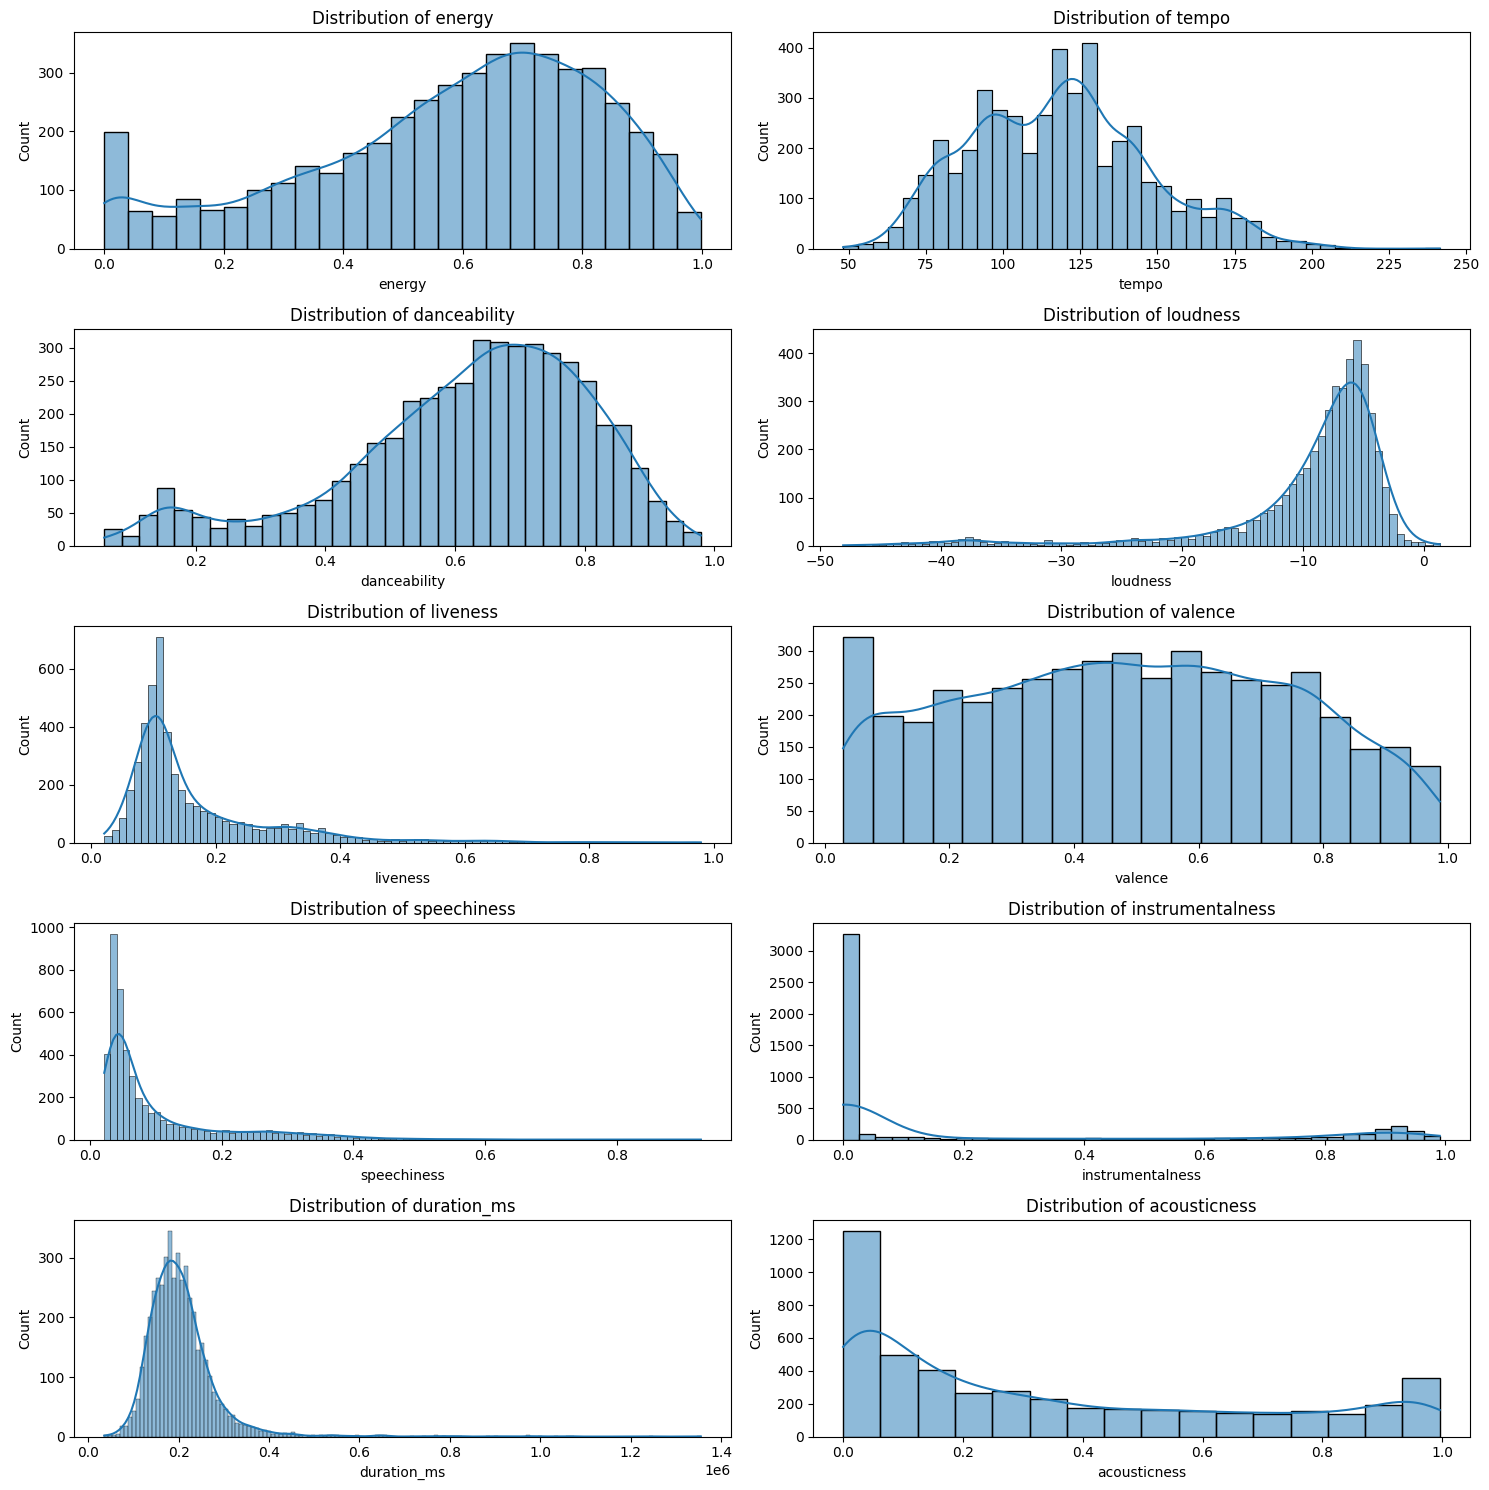

In [6]:
fig, axes = plt.subplots(5, 2, figsize=(15, 15))

for idx, feature in enumerate(audio_features_numerical):
    ax = axes[(int)(idx / 2), (int) (idx % 2)]
    sns.histplot(data[feature], kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

checking how popularity depends on numerical audio features

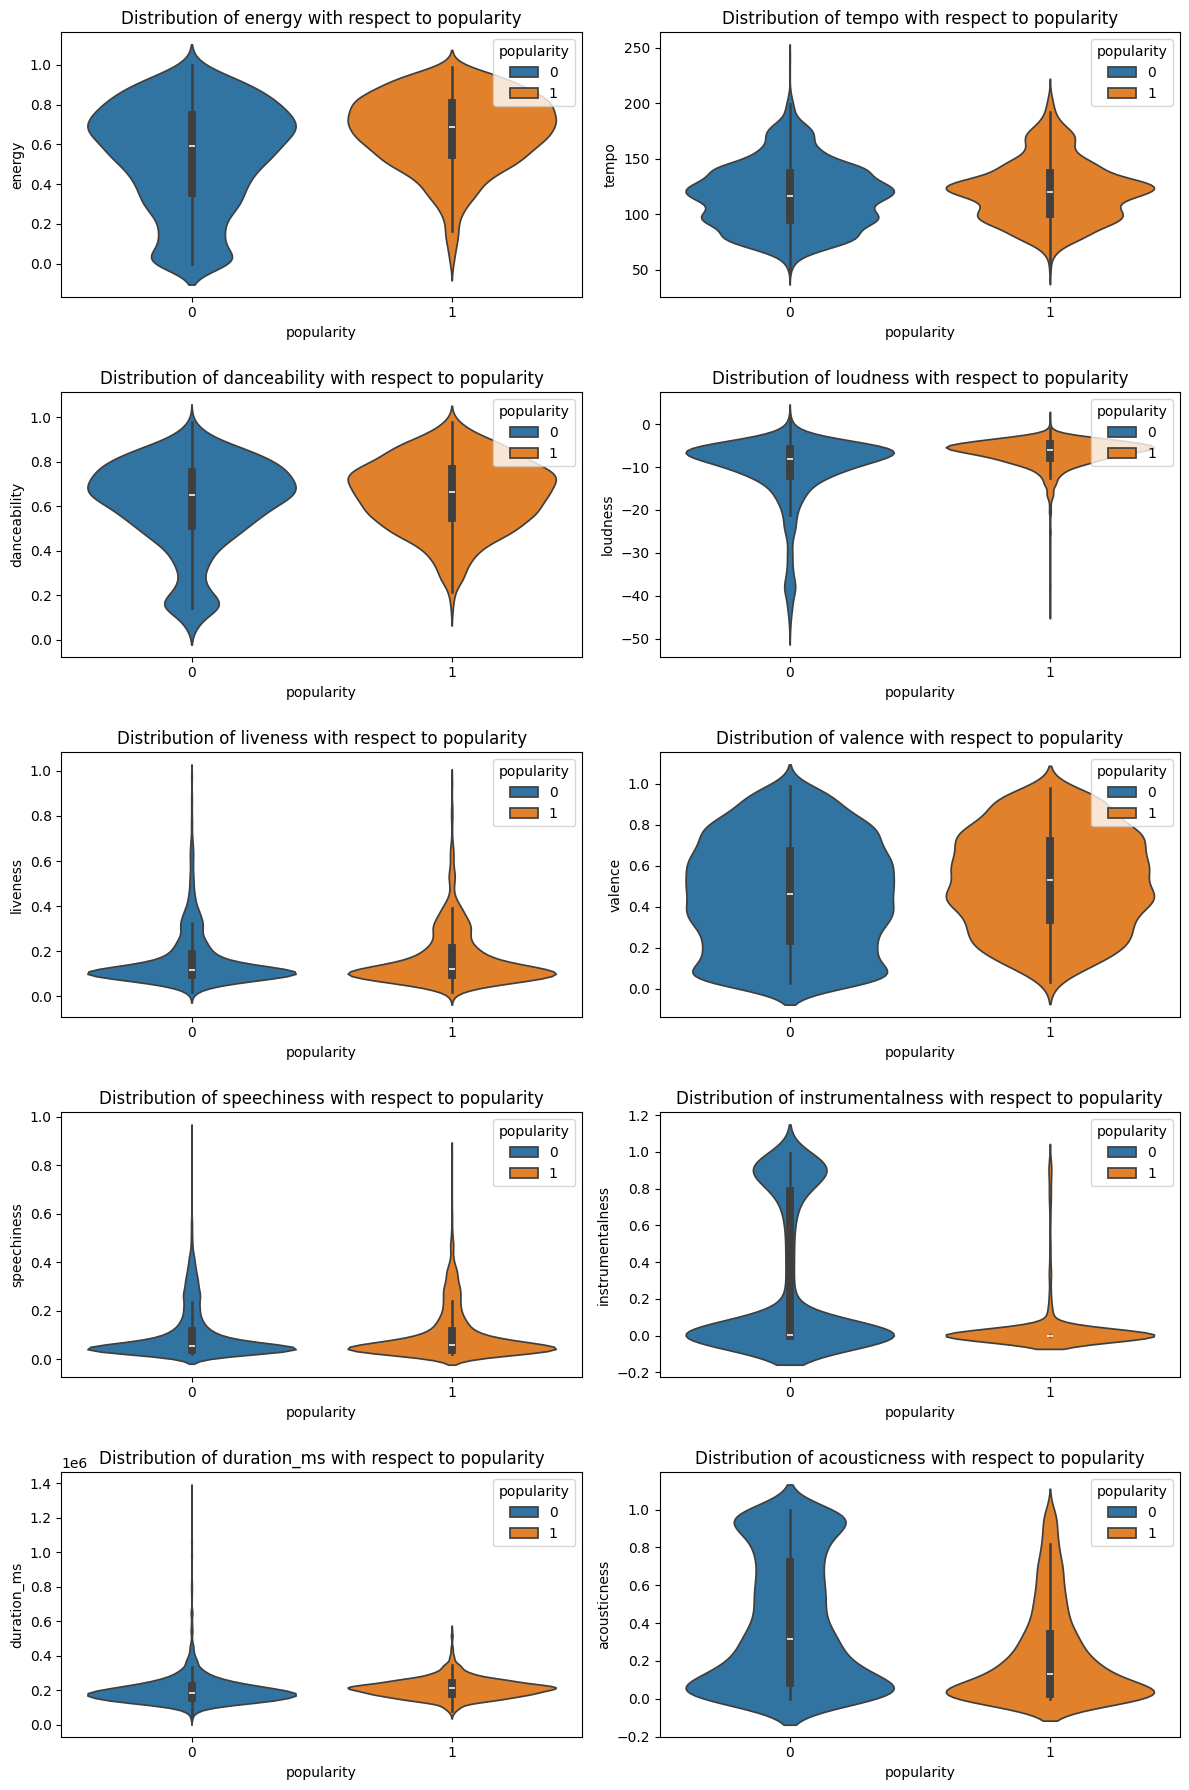

In [7]:
fig, axes = plt.subplots(5, 2, figsize=(12, 18))

for idx, feature in enumerate(audio_features_numerical):
    ax = axes[(int)(idx / 2), (int) (idx % 2)]
    sns.violinplot(data=data, x='popularity', y=feature, hue='popularity', ax=ax)
    ax.set_title(f'Distribution of {feature} with respect to popularity')

plt.tight_layout()
plt.show()

1. popular songs have high energy, high danceability, high loudness, mediocre to high valence, low instrumentalness, low acousticness, mediocre tempo and low duration
2. cannot say anything specifically about liveness and speechiness (as both popular and unpopular songs have very similar distribution)

correlation between the numerical audio features and popularity

Text(0.5, 23.52222222222222, 'popularity')

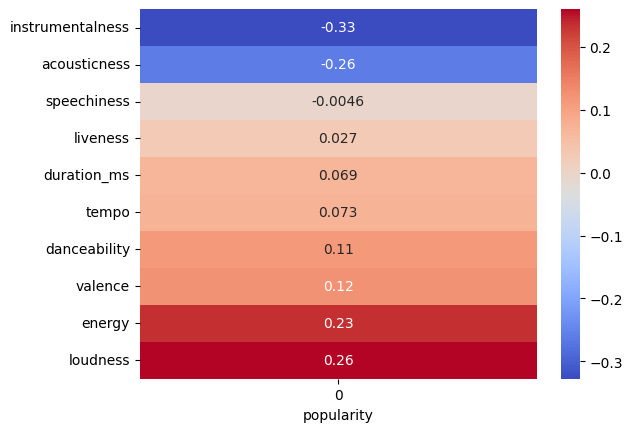

In [8]:
correlation = data[audio_features_numerical].corrwith(data['popularity']).sort_values().to_frame()
sns.heatmap(correlation, cmap='coolwarm', annot=True)
plt.xlabel('popularity')


liveness and speechiness are very less significant
1. energy and loudness have a positive correlation with popularity
2. danceability, valence, tempo, duration have low positive correlation
3. instrumentalness and acousticness have negative correlation

<h3>categorical audio features</h3>

In [9]:
audio_features_categorical = ['key', 'mode']

description of the features

In [10]:
data[audio_features_categorical].describe().T

,count,mean,std,min,25%,50%,75%,max
key,4718.0,5.238448,3.580467,0.0,2.0,5.0,8.0,11.0
mode,4718.0,0.562738,0.496101,0.0,0.0,1.0,1.0,1.0


distribution of categorical audio features

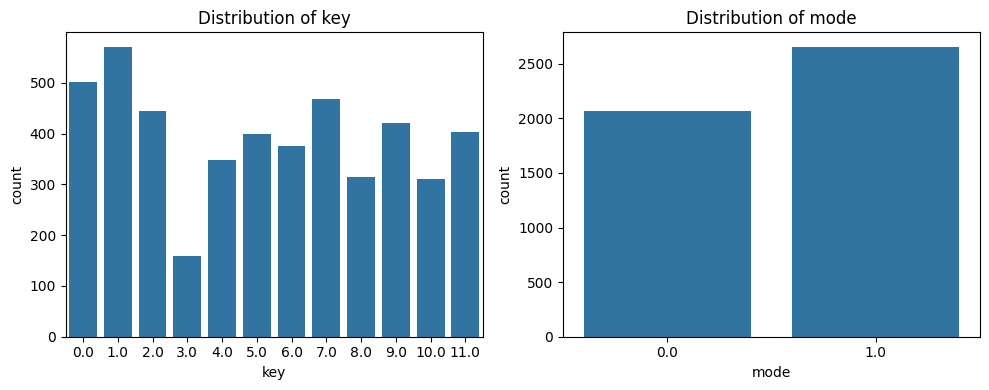

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for idx, feature in enumerate(audio_features_categorical):
    sns.countplot(data=data, x=feature, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

checking how popularity depends on categorical audio features

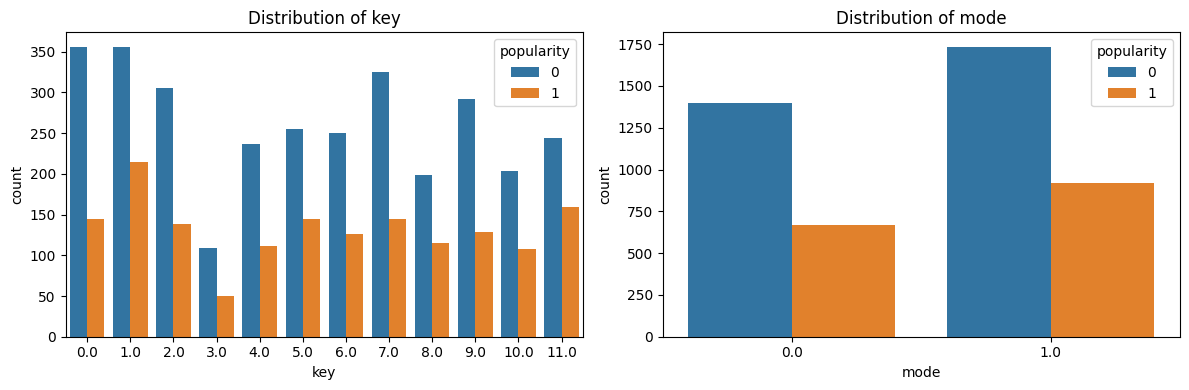

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for idx, feature in enumerate(audio_features_categorical):
    sns.countplot(data=data, x=feature, hue='popularity', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

correlation between the categorical audio features and popularity

In [13]:
data[['key']].corrwith(data['popularity'])

key    0.022127
dtype: float64

In [14]:
data[['mode']].corrwith(data['popularity'])

mode    0.025263
dtype: float64

both of the categorical audio feature are not much significant to determine popularity

<h3>descriptive features</h3>

In [15]:
descriptive_features = ['genre', 'time_signature', 'release_year']

distribution of descriptive features

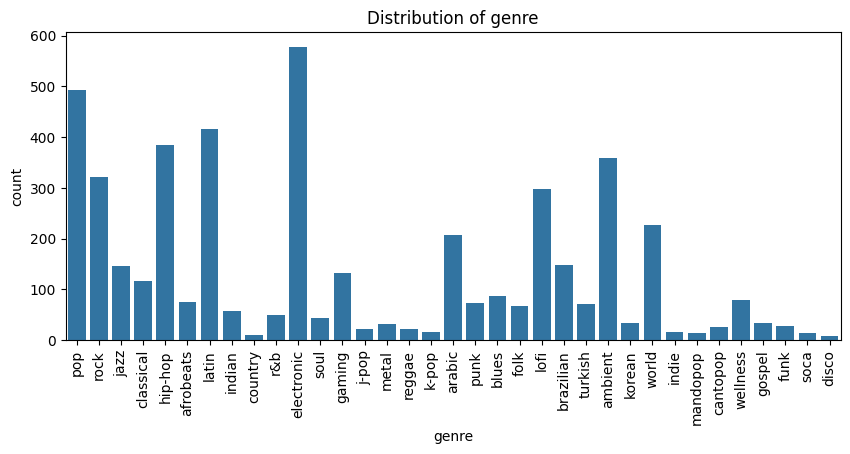

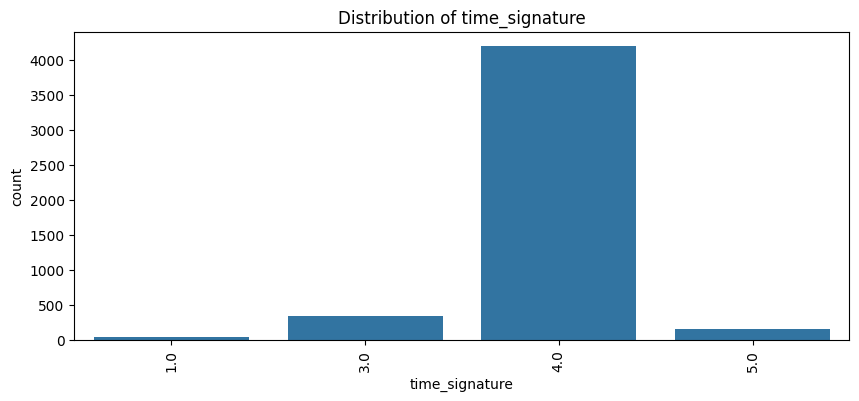

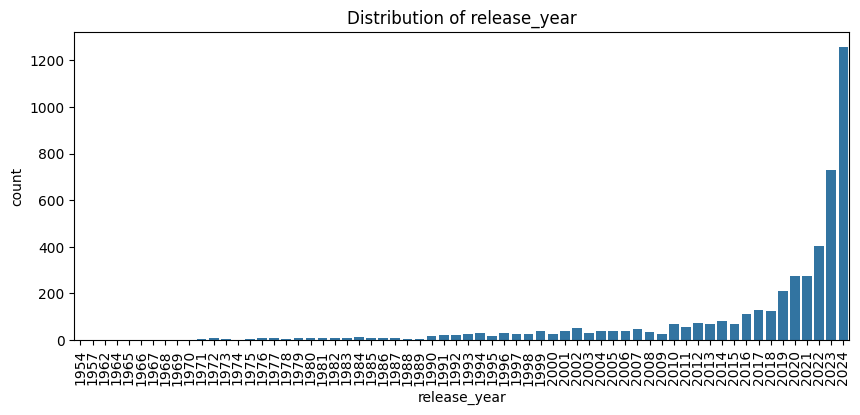

In [16]:
for feature in descriptive_features:
    plt.figure(figsize=(10,4))
    sns.countplot(data=data, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
    plt.show()


checking how popularity depends on descriptive features

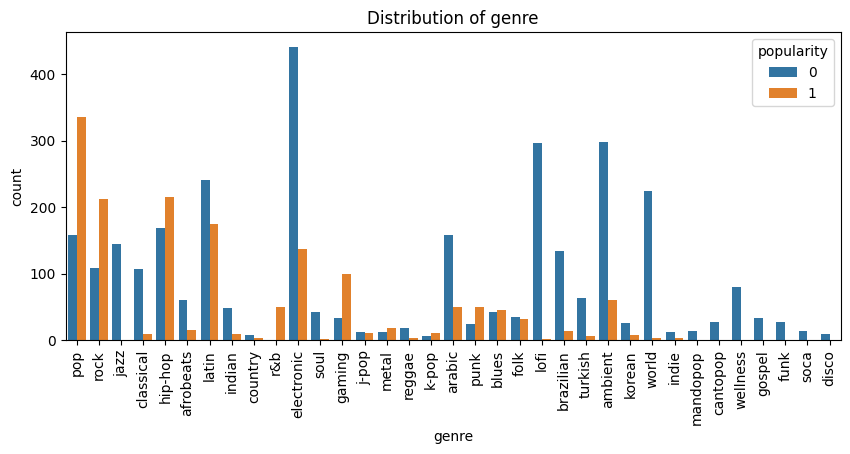

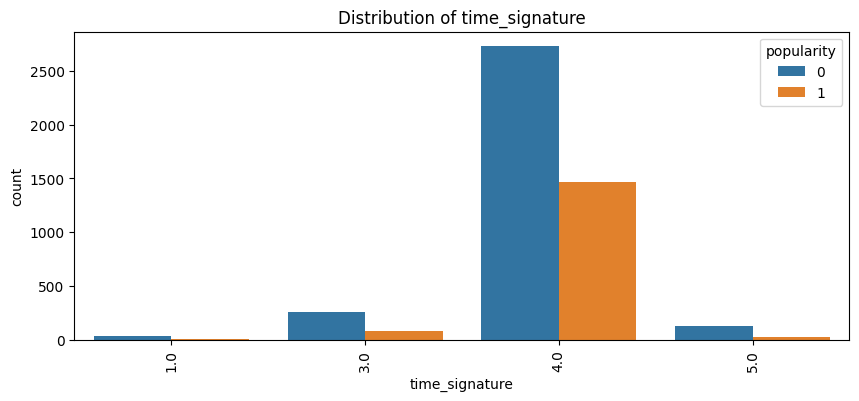

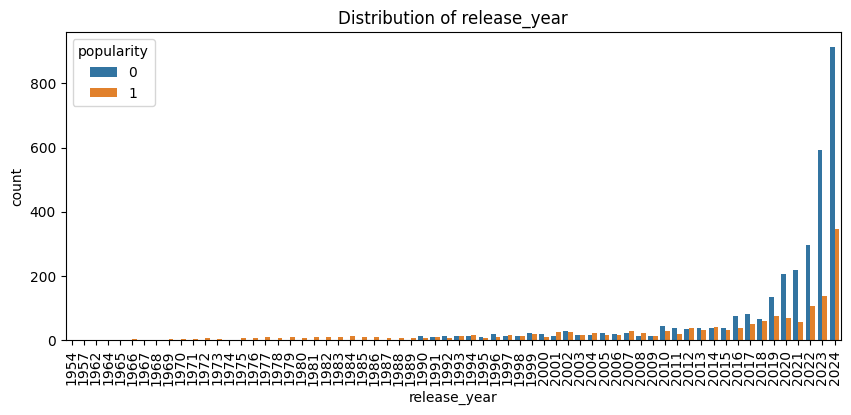

In [17]:
for feature in descriptive_features:
    plt.figure(figsize=(10,4))
    sns.countplot(data=data, x=feature, hue='popularity')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
    plt.show()

correlation of release year and time signature with popularity

In [18]:
data[['release_year']].corrwith(data['popularity'])

release_year   -0.298681
dtype: float64

In [19]:
data[['time_signature']].corrwith(data['popularity'])

time_signature    0.024717
dtype: float64

1. pop, rock and hiphop genres have most number of popular music
2. release year has a negative correlation with popularity
3. time signature is not much significant to determine popularity

<h4>popularity by genre</h4>

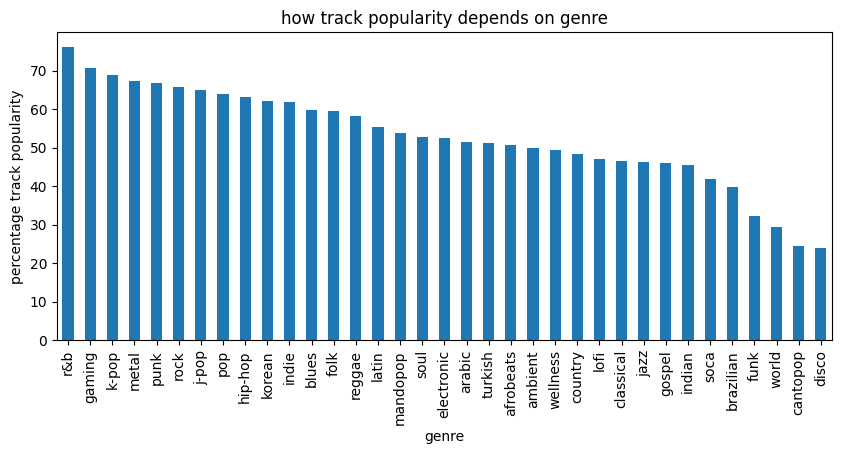

In [20]:
pop_by_genre = data.groupby('genre')['track_popularity'].mean()
pop_by_genre = pop_by_genre.sort_values(ascending=False)
plt.figure(figsize=(10,4))
pop_by_genre.plot(kind='bar')
plt.xlabel('genre')
plt.ylabel('percentage track popularity')
plt.title("how track popularity depends on genre")
plt.xticks(rotation=90)
plt.show()

r&b genre has highest percentage of popularity

<h4>popularity by release year</h4>

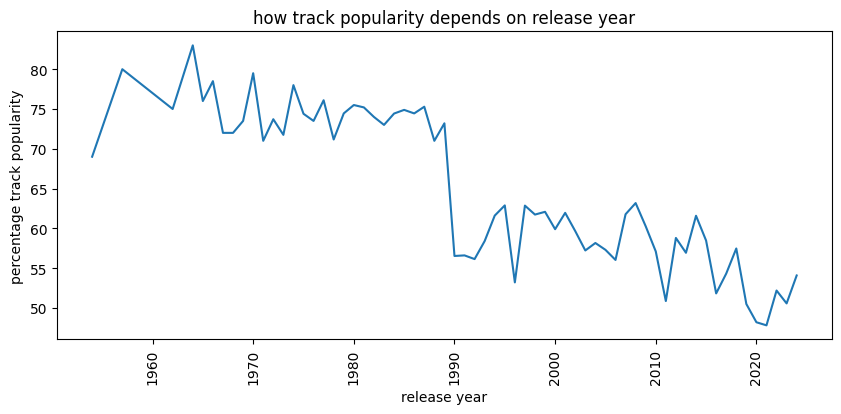

In [21]:
pop_by_year = data.groupby('release_year')['track_popularity'].mean()
plt.figure(figsize=(10,4))
pop_by_year.plot()
plt.xlabel('release year')
plt.ylabel('percentage track popularity')
plt.title("how track popularity depends on release year")
plt.xticks(rotation=90)
plt.show()

popularity of songs is seen to decrease over release years with a big drop around 1990, 2010 and 2020, but popularity is seen to increase a bit after 2020

<h3>mutual correlation</h3>

<Axes: >

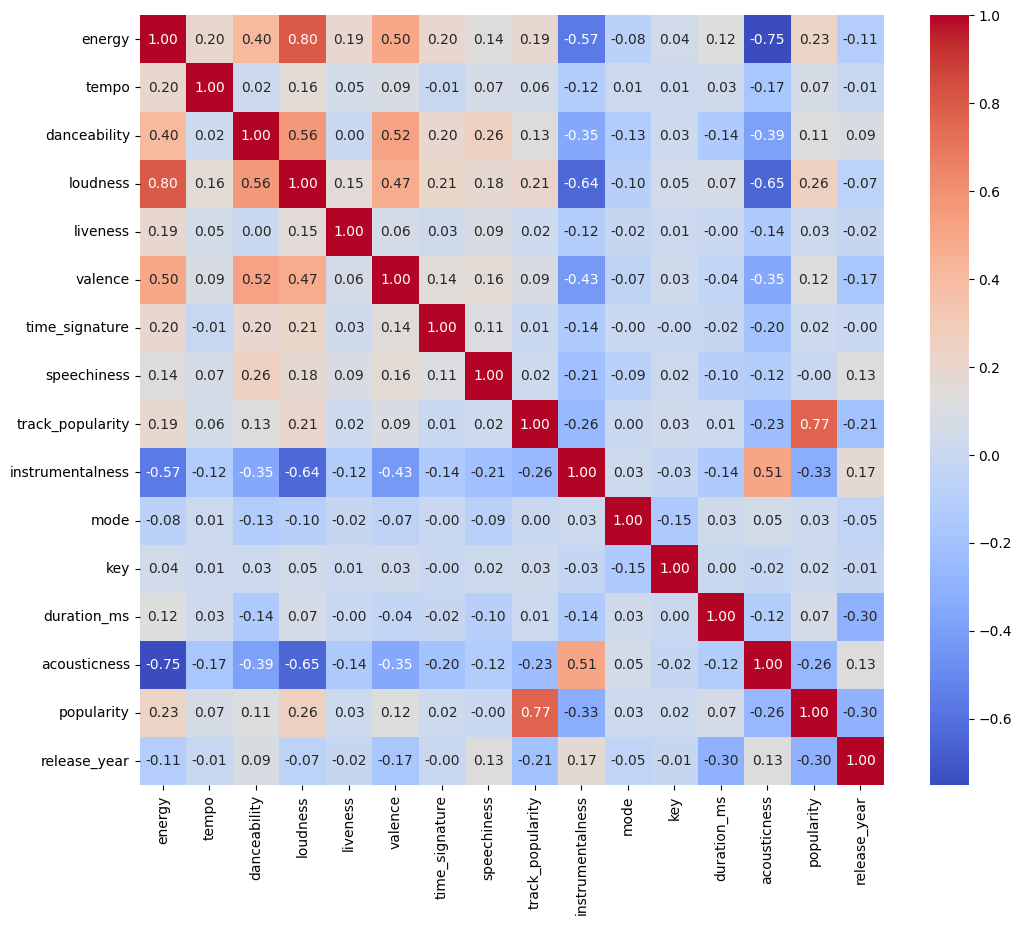

In [22]:
corr = data.select_dtypes(exclude='object').corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

from correlation matrix, it is seen that:
1. energy, tempo, danceability, valence and loudness have high positive mutual correlation among each other
2. instrumentalness and acousticness have high positive mutual correlation among each other
3. these 2 sets of features have negative correlation among them
4. duration has no specific relation with other features

track popularity and popularity have high positive correlation (which is obvious)

<Axes: xlabel='popularity', ylabel='track_popularity'>

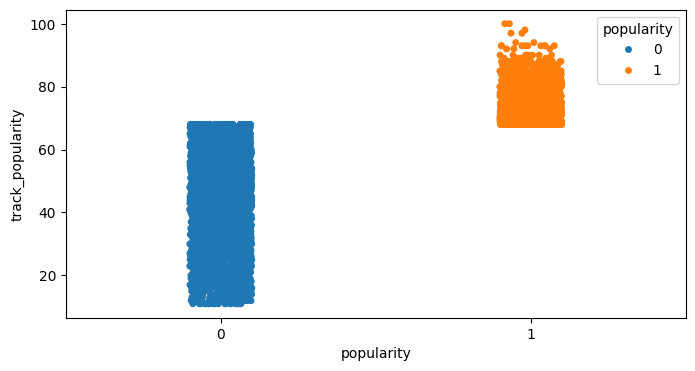

In [23]:
plt.figure(figsize=(8,4))
sns.stripplot(data=data, y='track_popularity', x='popularity', hue='popularity')

tracks with track popularity around above 70 are popular

<h3>how popularity of genre varies in 2000s (2000 - 2024)</h3>

lets define popularity of a genre as the mean track popularity of all the popular songs of that genre released in a year

In [24]:
df_grouped = data[data['popularity'] == 1].groupby(['genre', 'release_year'], as_index=False)['track_popularity'].mean().sort_values(by='track_popularity', ascending=False)

fig = go.Figure()

initial_year = 2024
df_initial = df_grouped[df_grouped['release_year'] == initial_year]

fig.add_trace(go.Bar(
    x=df_initial['genre'],
    y=df_initial['track_popularity'],
    name=f'Popularity of song genres in {initial_year}'
))

years = list(range(2024,1999,-1))

steps = []
for year in years:
    step = {
        'args': [
            {'x': [df_grouped[df_grouped['release_year'] == year]['genre']],
             'y': [df_grouped[df_grouped['release_year'] == year]['track_popularity']]},
            {'title': f'Popularity of song genres in {year}'}
        ],
        'label': str(year),
        'method': 'update'
    }
    steps.append(step)

fig.update_layout(
    title=f'Popularity of song genres in {initial_year}',
    sliders=[{
        'currentvalue': {
            'prefix': 'Year: ',
            'visible': True,
            'font': {'size': 20}
        },
        'pad': {'b': 10},
        'len': 0.9,
        'steps': steps
    }]
)

fig.show()

<h3>Popular Genres in 2023 and 2024</h3>

in 2023, pop songs were most popular followed by k-pop songs
<img src='./plots/genre2023.png' width='1000'/>

in 2024, pop songs were most popular followed by gaming songs
<img src='./plots/genre2024.png' width='1000'/>

as pop songs were the most popular in 2024, lets have a look what audio features pop songs of 2024 had

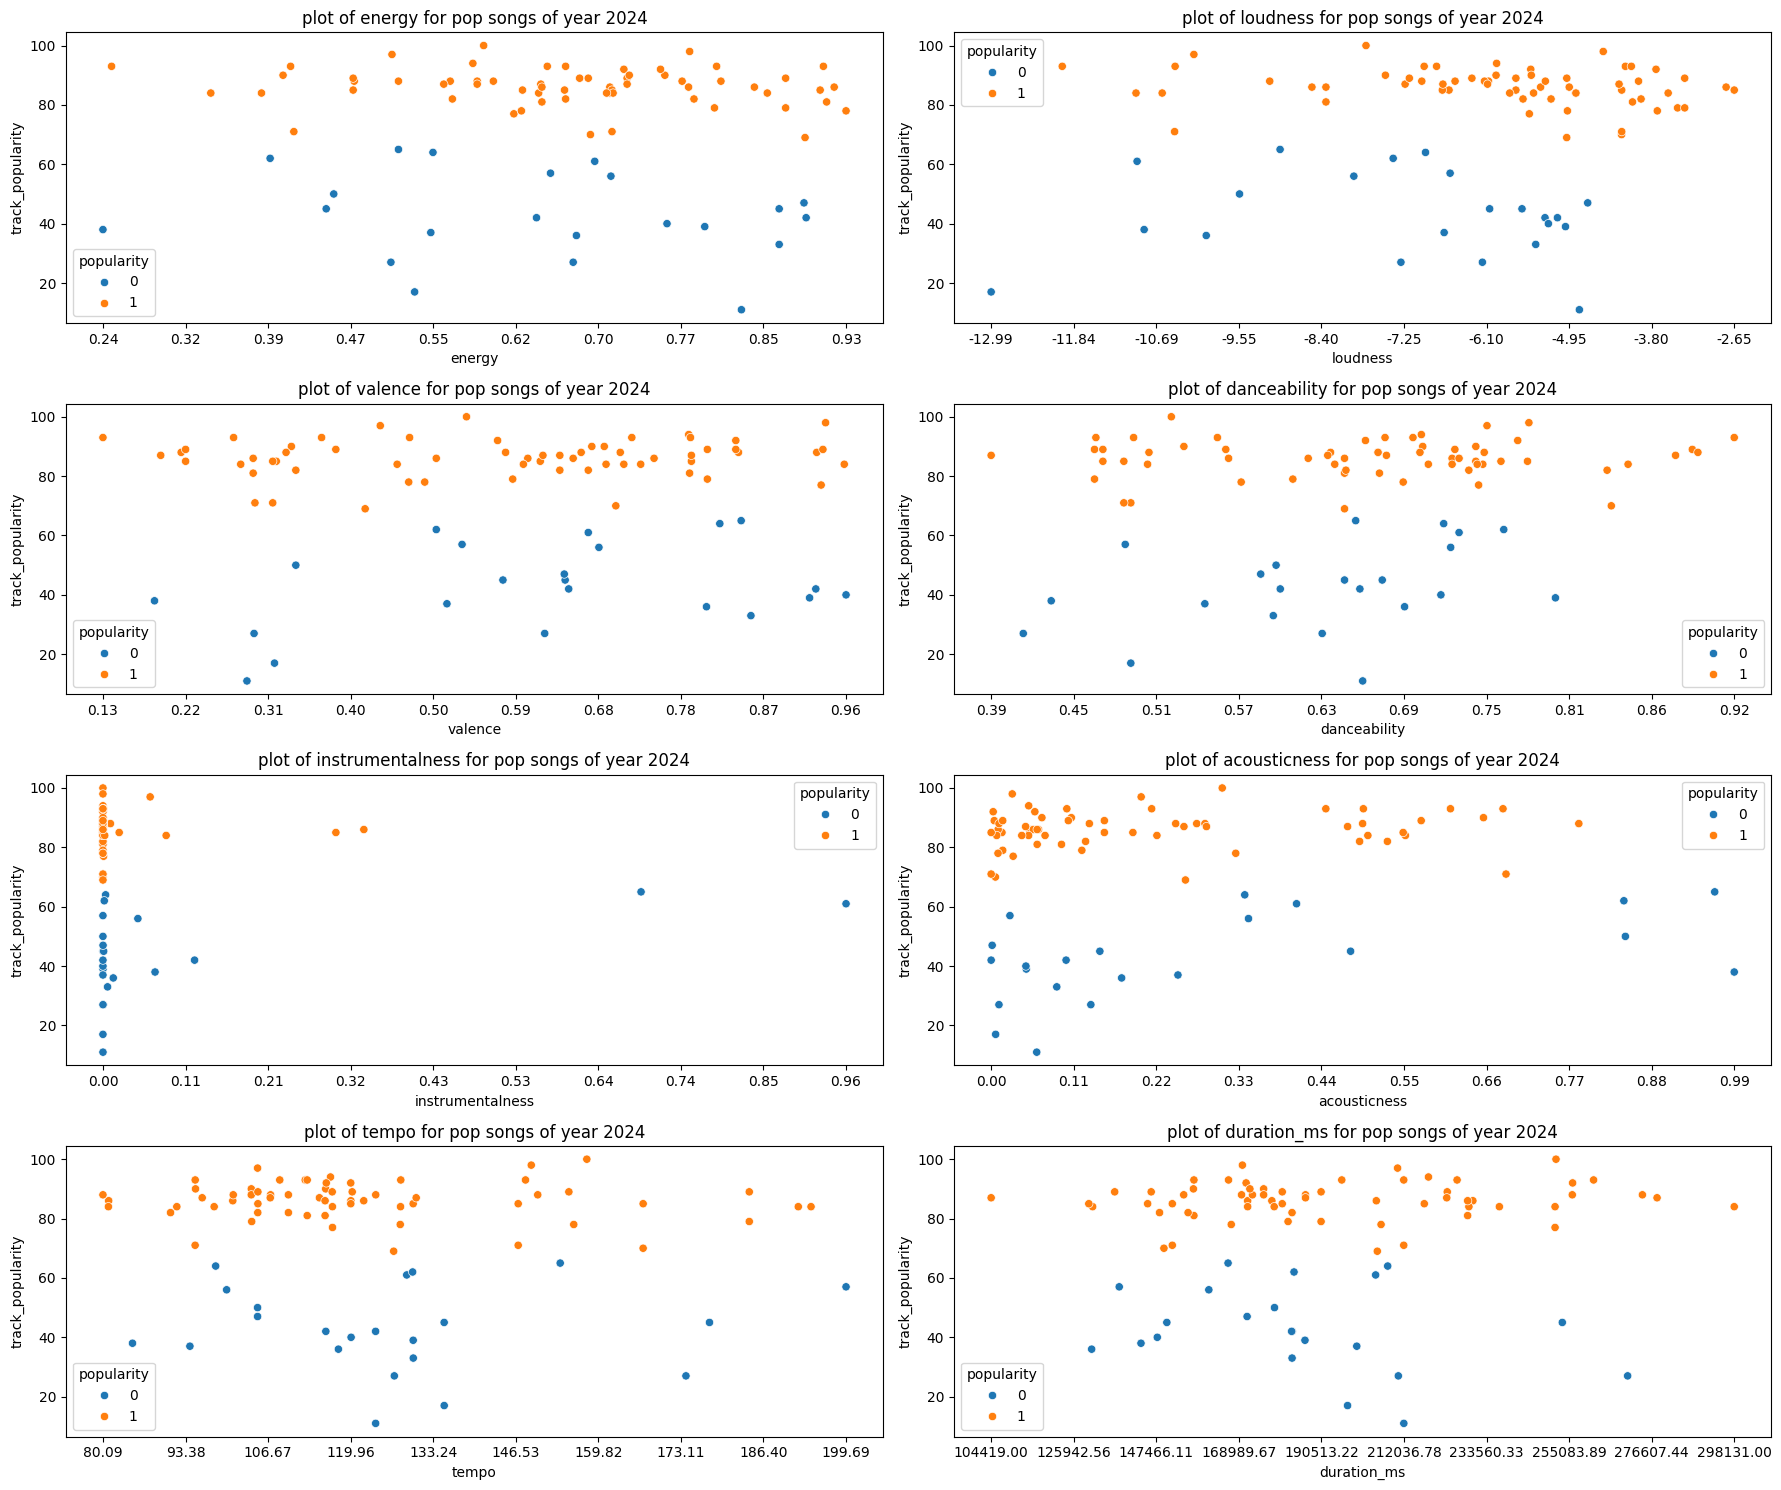

In [25]:
imp_audio_features = ['energy', 'loudness', 'valence', 'danceability', 'instrumentalness', 'acousticness', 'tempo', 'duration_ms']
req_data = data[(data['release_year'] == 2024) & (data['genre'] == 'pop')]
fig, axes = plt.subplots(4, 2, figsize=(18,15))

for idx, feature in enumerate(imp_audio_features):
    ax = axes[(int) (idx / 2), (int) (idx % 2)]
    x_col = req_data[feature]
    x_labels = np.linspace(x_col.min(), x_col.max(), 10)
    sns.scatterplot(data=req_data, x=feature, y='track_popularity', hue='popularity', ax=ax)
    ax.set_xticks(x_labels)  
    ax.set_xticklabels([f"{i:.2f}" for i in x_labels]) 
    ax.set_title(f'plot of {feature} for pop songs of year 2024')
    
plt.tight_layout()
plt.show()

popular pop songs of 2024 had:
1. high energy, loudness, danceability
2. mediocre to high valence, tempo, duration
3. almost 0 instrumentalness
4. low acousticness

<h3>Conclusions</h3>
1. Popular songs have:<pre>
    a. high energy<br> 
    b. mediocre to high danceability<br> 
    c. high loudness<br> 
    d. mediocre to high valence<br> 
    e. low instrumentalness<br> 
    f. low acousticness<br>
    g. mediocre tempo<br>
    h. low duration</pre>
2. Pop, rock and hip-hop genres have most number of popular songs<br>
3. r&b genre has highest percentage of popular songs<br>
4. Popularity of songs is seen to decrease over release years, but a slight increase is seen after 2020<br>
5. Pop songs had highest popularity in 2024<br>
6. Liveness, speechiness, key, mode and time signature are not significant to determine popularity of a song